In [1]:
import pandas as pd
import ast

XNLI = pd.read_csv('./ANC_XNLI.txt', sep=';')
# Преобразование строки со значениями в список чисел
XNLI['Value'] = XNLI['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_XNLI_by_pair = XNLI.groupby('Language Pair')['Value'].apply(list)

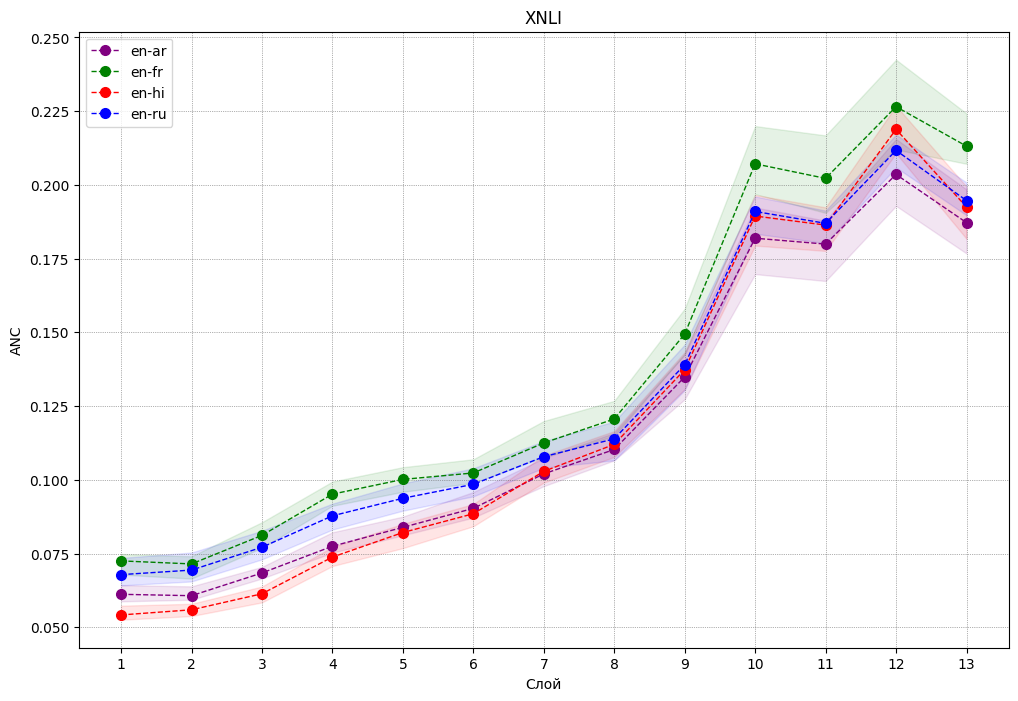

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))

colors = {
    "en-ru": "blue",
    "en-fr": "green",
    "en-hi": "red",
    "en-ar": "purple",
    "en-es": "orange",
    "en-it": "magenta"
}

for (lang_pair, values) in data_XNLI_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    plt.plot(x, mean_values, marker='o', markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.1)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()


In [8]:
Readme = pd.read_csv('./ANC_Readme.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme['Value'] = Readme['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_by_pair = Readme.groupby('Language Pair')['Value'].apply(list)

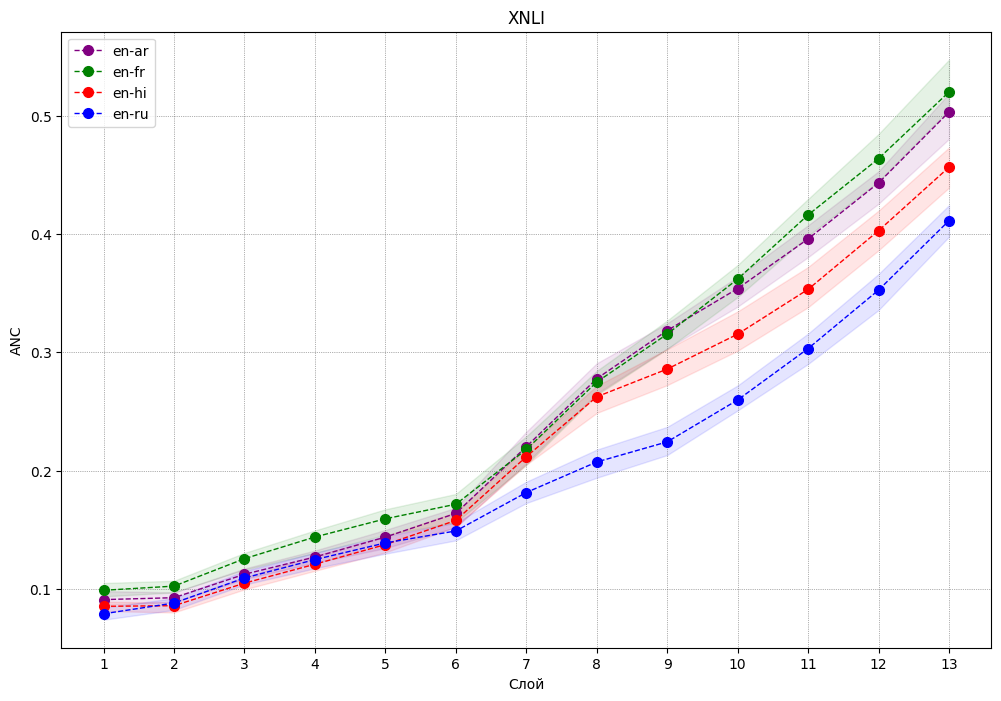

In [9]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_Readme_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    plt.plot(x, mean_values, marker='o', markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.1)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [10]:
VvsW = pd.read_csv('./ANC_VvsW.txt', sep=';')
# Преобразование строки со значениями в список чисел
VvsW['Value'] = VvsW['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_VvsW_by_pair = VvsW.groupby('Language Pair')['Value'].apply(list)

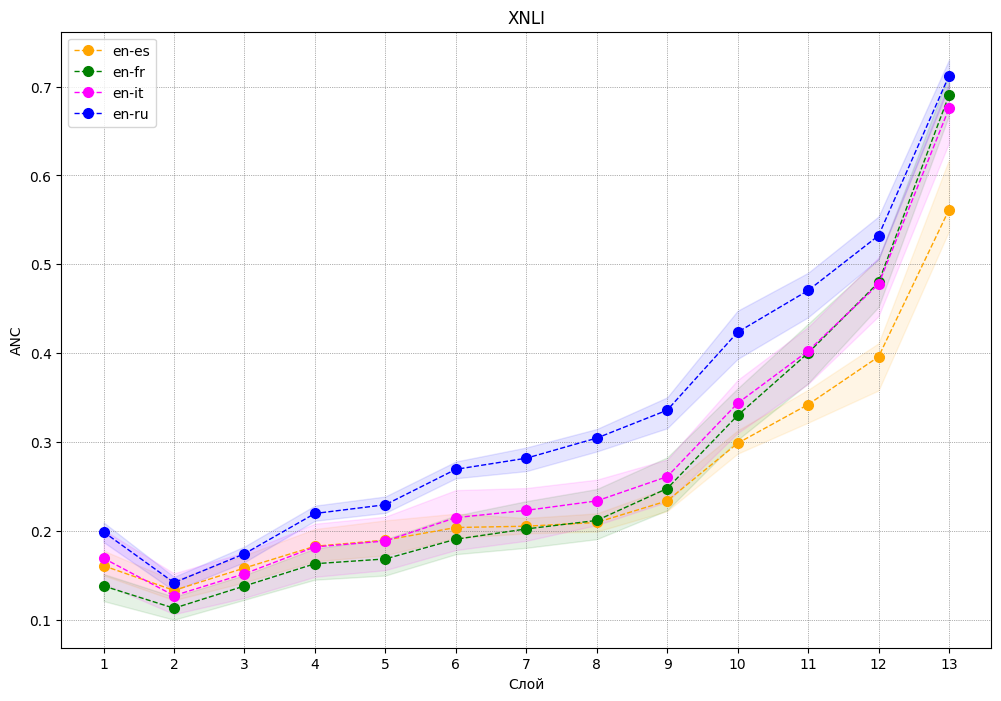

In [11]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_VvsW_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    plt.plot(x, mean_values, marker='o', markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.1)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [12]:
data_dict = {'а': data_XNLI_by_pair, 'б': data_Readme_by_pair, 'в': data_VvsW_by_pair}

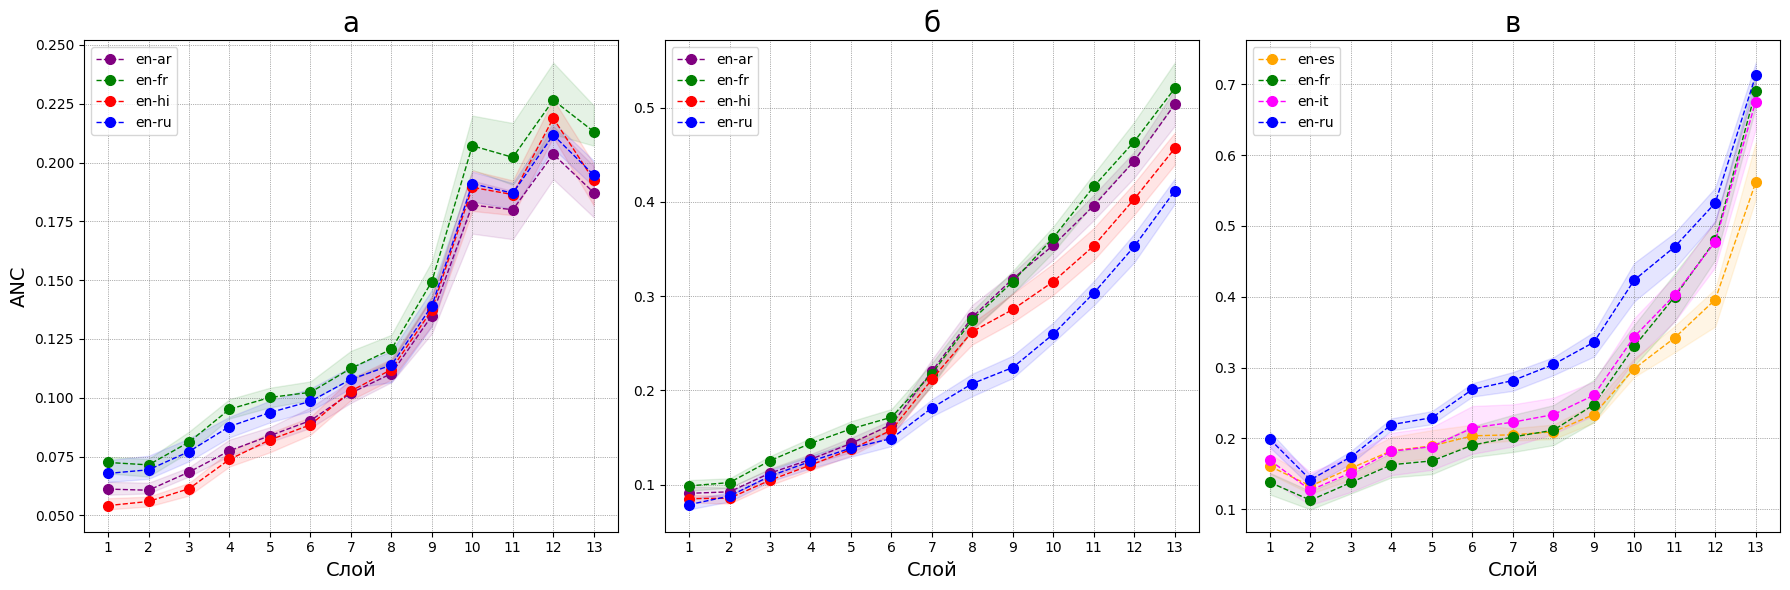

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict.items()):
    # Выбор текущей оси
    ax = axs[idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        ax.plot(x, mean_values, marker='o', markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    ax.set_title(data_key, size=20)
    ax.set_xlabel('Слой', size=14)
    if idx == 0:
        ax.set_ylabel('ANC', size=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.legend()
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()
